UCB

In [ ]:
import numpy as np
class UpperConfidenceBound:
    def __init__(self, True_mean_values, total_number_of_steps):
        self.n_arms = np.size(True_mean_values)
        self.true_mean_values = True_mean_values
        self.total_number_of_steps = total_number_of_steps
        self.no_of_times_arm_selected = np.zeros(self.n_arms)
        self.mean_reward_per_arm = np.zeros(self.n_arms)
        self.current_step = 0
        self.mean_reward = np.zeros(total_number_of_steps + 1)
        self.current_reward = 0

    def select_arm(self):
        if self.current_step < self.n_arms:
            arm_selected = self.current_step
        else:
            upper_bound_values = self.mean_reward_per_arm + np.sqrt(2 * np.log(self.current_step) / self.no_of_times_arm_selected)
            arm_selected = np.argmax(upper_bound_values)

        self.current_step += 1
        self.no_of_times_arm_selected[arm_selected] += 1
        self.current_reward = np.random.normal(self.true_mean_values[arm_selected], 2)
        self.mean_reward[self.current_step] = self.mean_reward[self.current_step - 1] + \
            ((1 / self.current_step) * (self.current_reward - self.mean_reward[self.current_step - 1]))
        self.mean_reward_per_arm[arm_selected] = self.mean_reward_per_arm[arm_selected] + \
            ((1 / self.no_of_times_arm_selected[arm_selected]) * (self.current_reward - self.mean_reward_per_arm[arm_selected]))

    def play_the_game(self):
        for i in range(self.total_number_of_steps):
            self.select_arm()

    def restart(self):
        self.current_step = 0
        self.no_of_times_arm_selected = np.zeros(self.n_arms)
        self.mean_reward_per_arm = np.zeros(self.n_arms)
        self.mean_reward = np.zeros(self.total_number_of_steps + 1)
        self.current_reward = 0


Testing 5 Arms with 2000 plays using UCB
Final average reward: 1.6010993923503907
Number of times each arm was selected: [5.000e+00 5.000e+00 1.000e+00 1.986e+03 3.000e+00]
Most selected arm: 3

Testing 10 Arms with 2000 plays using UCB
Final average reward: 1.5335214407899447
Number of times each arm was selected: [1.00e+01 1.97e+03 4.00e+00 3.00e+00 1.00e+00 2.00e+00 2.00e+00 5.00e+00
 2.00e+00 1.00e+00]
Most selected arm: 1

Testing 20 Arms with 2000 plays using UCB
Final average reward: 1.670481044487939
Number of times each arm was selected: [3.000e+00 4.000e+00 1.100e+01 2.000e+00 1.000e+00 1.010e+02 4.000e+00
 1.000e+00 3.000e+00 5.000e+00 2.000e+00 3.000e+00 1.000e+01 2.000e+00
 6.000e+00 1.000e+00 1.822e+03 4.000e+00 2.000e+00 1.300e+01]
Most selected arm: 16


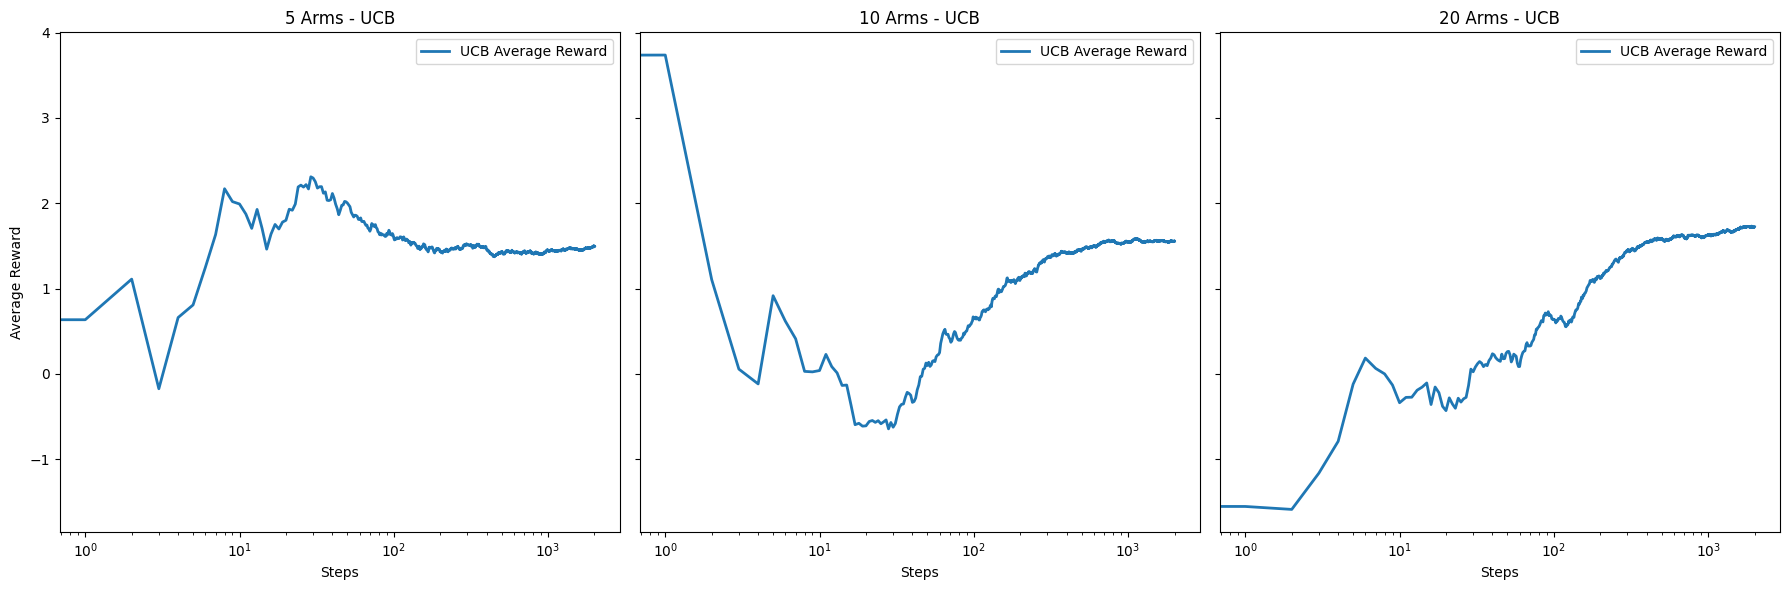

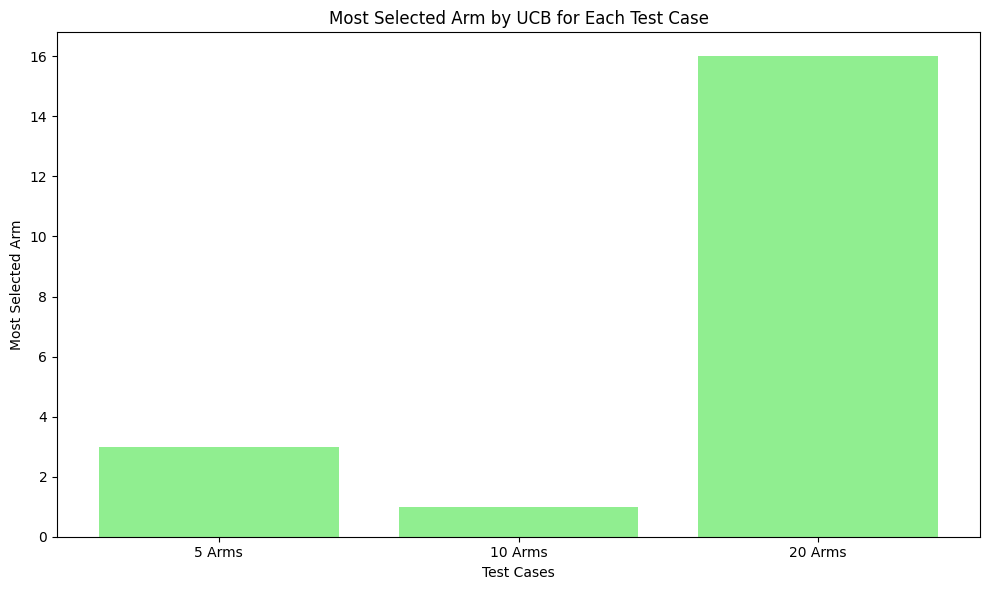

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#from UpperConfidenceBound import UpperConfidenceBound  # Import your UCB class

# Set random seed for reproducibility
np.random.seed(42)

# Total number of steps (plays)
total_number_of_steps = 2000

# Define test cases for different numbers of arms.
# For each test case, we generate an array of true mean values for the arms from a normal distribution.
test_cases = {
    "5 Arms": np.random.normal(0, 1, 5),
    "10 Arms": np.random.normal(0, 1, 10),
    "20 Arms": np.random.normal(0, 1, 20),
}

# ------------------------------------------------------------
# Test the UCB algorithm on each test case and print summary results
# ------------------------------------------------------------
for case, true_mean_values in test_cases.items():
    print(f"\nTesting {case} with {total_number_of_steps} plays using UCB")
    # Create an instance of your UCB algorithm using the test case true mean values
    ucb_bandit = UpperConfidenceBound(true_mean_values, total_number_of_steps)

    # Run the simulation
    ucb_bandit.play_the_game()

    # Print the final average reward and selection counts
    print("Final average reward:", ucb_bandit.mean_reward[-1])
    print("Number of times each arm was selected:", ucb_bandit.no_of_times_arm_selected)
    print("Most selected arm:", np.argmax(ucb_bandit.no_of_times_arm_selected))

# ------------------------------------------------------------
# Plotting the average reward curves for each test case
# ------------------------------------------------------------
fig, axes = plt.subplots(1, len(test_cases), figsize=(18, 6), sharey=True)

for idx, (case, true_mean_values) in enumerate(test_cases.items()):
    ax = axes[idx]
    # Create a new UCB instance for plotting (ensuring fresh initialization)
    ucb_bandit = UpperConfidenceBound(true_mean_values, total_number_of_steps)
    ucb_bandit.play_the_game()

    # Plot the average reward over the total steps
    ax.plot(np.arange(total_number_of_steps + 1), ucb_bandit.mean_reward,
            label='UCB Average Reward', linewidth=2)

    # Use logarithmic scale for the x-axis (steps) to better visualize early learning
    ax.set_xscale("log")
    ax.set_xlabel("Steps")
    ax.set_title(f"{case} - UCB")
    ax.legend()

axes[0].set_ylabel("Average Reward")
plt.tight_layout()
plt.savefig("ucb_results.png", dpi=300)
plt.show()

# ------------------------------------------------------------
# Plot a bar chart of the most selected arm for each test case
# ------------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 6))
most_selected = []  # To store the index of the most selected arm for each test case
for case, true_mean_values in test_cases.items():
    ucb_bandit = UpperConfidenceBound(true_mean_values, total_number_of_steps)
    ucb_bandit.play_the_game()
    most_selected.append(np.argmax(ucb_bandit.no_of_times_arm_selected))

# Create a bar chart showing which arm was most selected for each test case
ax.bar(list(test_cases.keys()), most_selected, color='lightgreen')
ax.set_xlabel("Test Cases")
ax.set_ylabel("Most Selected Arm")
ax.set_title("Most Selected Arm by UCB for Each Test Case")
plt.tight_layout()
plt.savefig("ucb_most_selected.png", dpi=300)
plt.show()


EG

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Multi arm bandit problem solution using epsilon greedy algorithm
class MultiArmBanditProblem:
    def __init__(self, True_mean_values , epsilon , total_number_of_steps ):
        self.n_arms = np.size(True_mean_values)
        self.true_mean_values = True_mean_values
        self.epsilon = epsilon
        self.current_step = 0
        self.total_number_of_steps = total_number_of_steps
        self.no_of_times_arm_selected=np.zeros(self.n_arms)
        self.mean_reward_per_arm = np.zeros(self.n_arms)
        self.current_reward = 0
        self.mean_reward =np.zeros(total_number_of_steps+1)

    def select_arm(self):
        probability_of_drawing = np.random.rand()
        # If it's the first step or if the random number is less than or equal to epsilon, explore
        if self.current_step == 0 or probability_of_drawing <= self.epsilon:
            arm_selected = np.random.choice(self.n_arms)
        else:  # Otherwise, exploit
            arm_selected = np.argmax(self.mean_reward_per_arm)
        self.current_step += 1
        self.no_of_times_arm_selected[arm_selected] += 1
        self.current_reward = np.random.normal(self.true_mean_values[arm_selected], 2)
        self.mean_reward[self.current_step] = self.mean_reward[self.current_step - 1] + \
            ((1 / self.current_step) * (self.current_reward - self.mean_reward[self.current_step - 1]))
        self.mean_reward_per_arm[arm_selected] = self.mean_reward_per_arm[arm_selected] + \
            ((1 / self.no_of_times_arm_selected[arm_selected]) * (self.current_reward - self.mean_reward_per_arm[arm_selected]))


    def play_the_game(self):
        for i in range(self.total_number_of_steps):
                self.select_arm()
    def restart(self):
        self.current_step = 0
        self.no_of_times_arm_selected = np.zeros(self.n_arms)
        self.mean_reward_per_arm = np.zeros(self.n_arms)
        self.mean_reward = np.zeros(self.total_number_of_steps + 1)
        self.current_reward = 0


Testing 5 Arms with epsilon=0 and 2000 plays

Testing 10 Arms with epsilon=0 and 2000 plays

Testing 20 Arms with epsilon=0 and 2000 plays


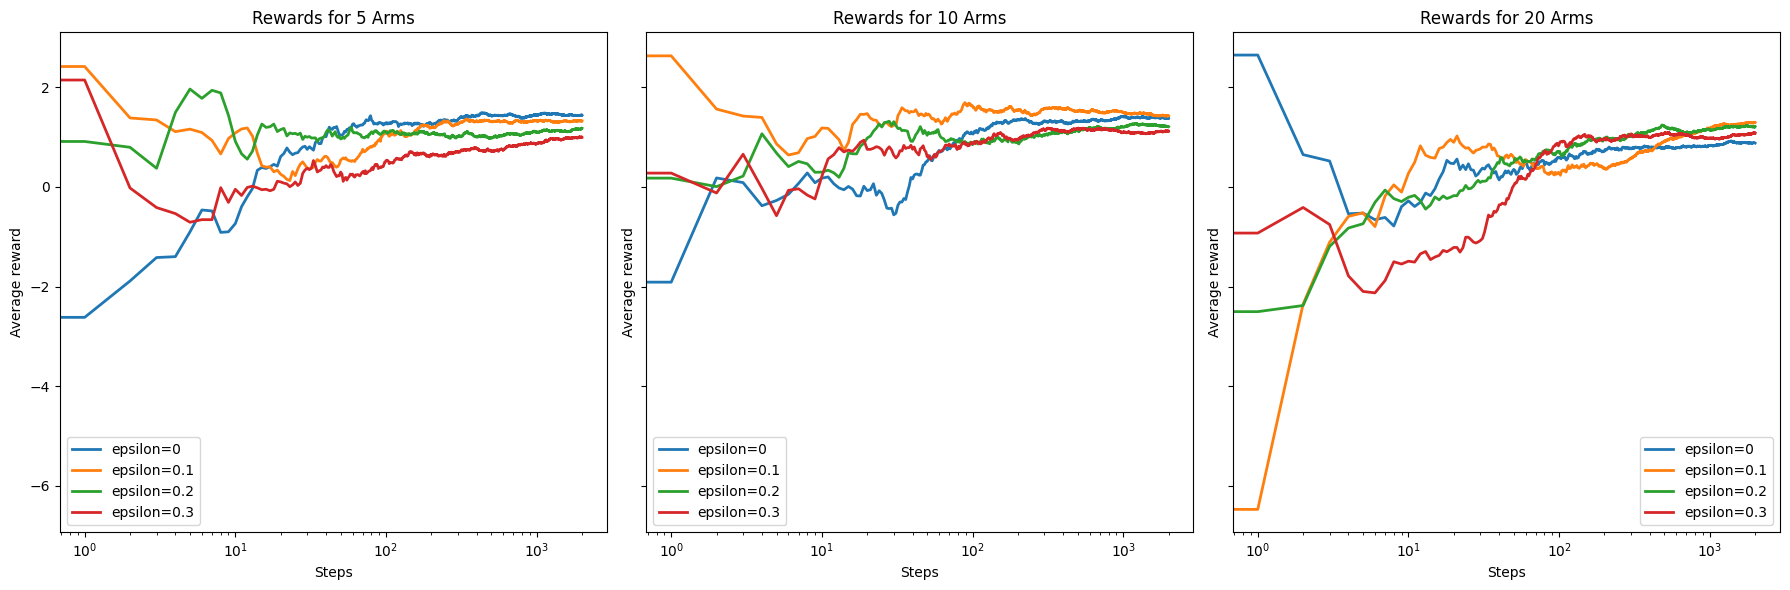

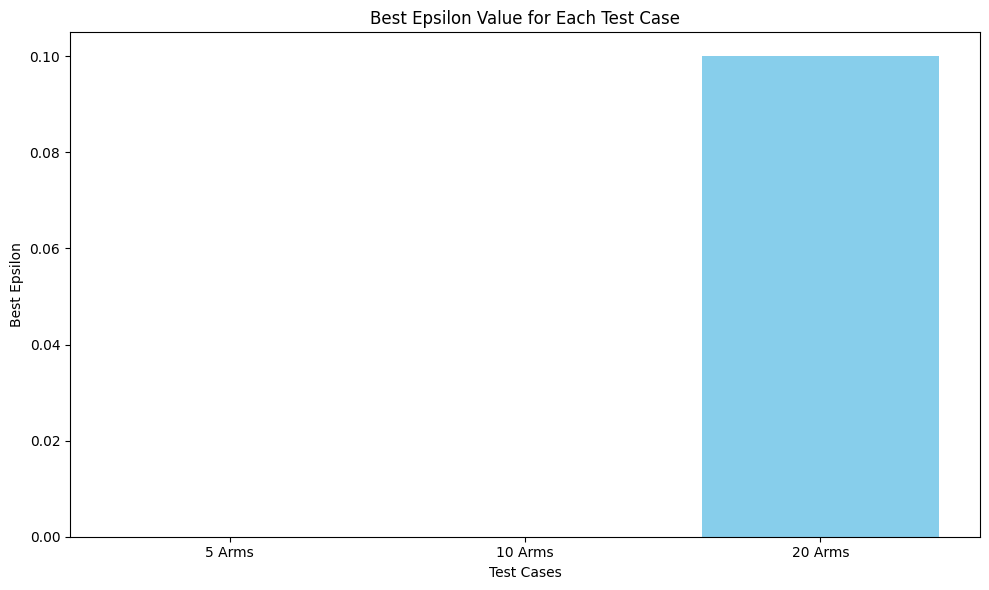

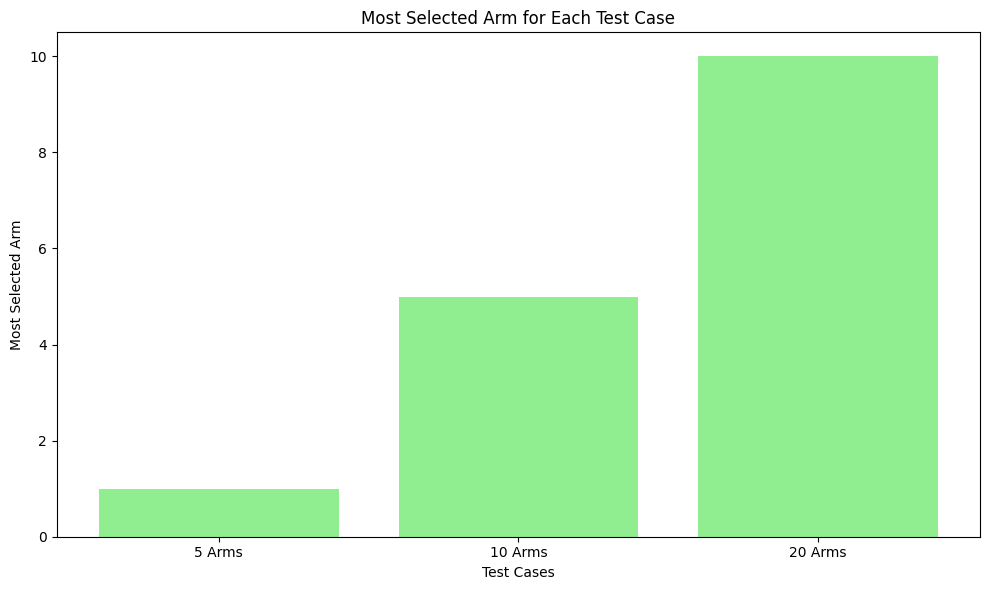

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#from Multi_Arm_Bandit import MultiArmBanditProblem
np.random.seed(30)  # Ensuring reproducibility
epsilon1 = 0
epsilon2 = 0.1
epsilon3 = 0.2
epsilon4 = 0.3
total_number_of_steps = 2000
test_cases = {
    "5 Arms": np.random.normal(0, 1, 5),
    "10 Arms": np.random.normal(0, 1, 10),
    "20 Arms": np.random.normal(0, 1, 20),
}

for case, true_mean_values in test_cases.items():
    print(f"\nTesting {case} with epsilon={epsilon1} and {total_number_of_steps} plays")

    bandit = MultiArmBanditProblem(true_mean_values, epsilon1, total_number_of_steps)
    bandit.play_the_game()
    epsilon1MeanReward = bandit.mean_reward

    bandit = MultiArmBanditProblem(true_mean_values, epsilon2, total_number_of_steps)
    bandit.play_the_game()
    epsilon2MeanReward = bandit.mean_reward

    bandit = MultiArmBanditProblem(true_mean_values, epsilon3, total_number_of_steps)
    bandit.play_the_game()
    epsilon3MeanReward = bandit.mean_reward

    bandit = MultiArmBanditProblem(true_mean_values, epsilon4, total_number_of_steps)
    bandit.play_the_game()
    epsilon4MeanReward = bandit.mean_reward
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for idx, (case, true_mean_values) in enumerate(test_cases.items()):
    ax = axes[idx]
    for epsilon in [epsilon1, epsilon2, epsilon3, epsilon4]:
        bandit = MultiArmBanditProblem(true_mean_values, epsilon, total_number_of_steps)
        bandit.play_the_game()
        mean_reward = bandit.mean_reward
        ax.plot(np.arange(total_number_of_steps + 1), mean_reward, linewidth=2, label=f'epsilon={epsilon}')

    ax.set_xscale("log")
    ax.set_xlabel('Steps')
    ax.set_ylabel('Average reward')
    ax.set_title(f'Rewards for {case}')
    ax.legend()

plt.tight_layout()
plt.savefig('results_combined.png', dpi=300)
plt.show()

best_epsilons = {}
most_selected_arms = {}

for case, true_mean_values in test_cases.items():
    best_mean_reward = -np.inf
    best_epsilon = None
    best_bandit = None
    for epsilon in [epsilon1, epsilon2, epsilon3, epsilon4]:
        bandit = MultiArmBanditProblem(true_mean_values, epsilon, total_number_of_steps)
        bandit.play_the_game()
        mean_reward = bandit.mean_reward[-1]  # Get the final mean reward
        if mean_reward > best_mean_reward:
            best_mean_reward = mean_reward
            best_epsilon = epsilon
            best_bandit = bandit
    best_epsilons[case] = best_epsilon
    most_selected_arms[case] = np.argmax(best_bandit.no_of_times_arm_selected)

# Plotting the best epsilon values for each case
fig, ax = plt.subplots(figsize=(10, 6))
cases = list(best_epsilons.keys())
epsilons = list(best_epsilons.values())
ax.bar(cases, epsilons, color='skyblue')
ax.set_xlabel('Test Cases')
ax.set_ylabel('Best Epsilon')
ax.set_title('Best Epsilon Value for Each Test Case')
plt.tight_layout()
plt.savefig('best_epsilons.png', dpi=300)
plt.show()

# Plotting the most selected arms for each case
fig, ax = plt.subplots(figsize=(10, 6))
arms = list(most_selected_arms.values())
ax.bar(cases, arms, color='lightgreen')
ax.set_xlabel('Test Cases')
ax.set_ylabel('Most Selected Arm')
ax.set_title('Most Selected Arm for Each Test Case')
plt.tight_layout()
plt.savefig('most_selected_arms.png', dpi=300)
plt.show()

TS


Testing 5 Arms with Thompson Sampling for 2000 plays
The true mean values assigned for this play is:[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337]
the most selected arm 3

Testing 10 Arms with Thompson Sampling for 2000 plays
The true mean values assigned for this play is:[-0.23413696  1.57921282  0.76743473 -0.46947439  0.54256004 -0.46341769
 -0.46572975  0.24196227 -1.91328024 -1.72491783]
the most selected arm 1

Testing 20 Arms with Thompson Sampling for 2000 plays
The true mean values assigned for this play is:[-0.56228753 -1.01283112  0.31424733 -0.90802408 -1.4123037   1.46564877
 -0.2257763   0.0675282  -1.42474819 -0.54438272  0.11092259 -1.15099358
  0.37569802 -0.60063869 -0.29169375 -0.60170661  1.85227818 -0.01349722
 -1.05771093  0.82254491]
the most selected arm 16


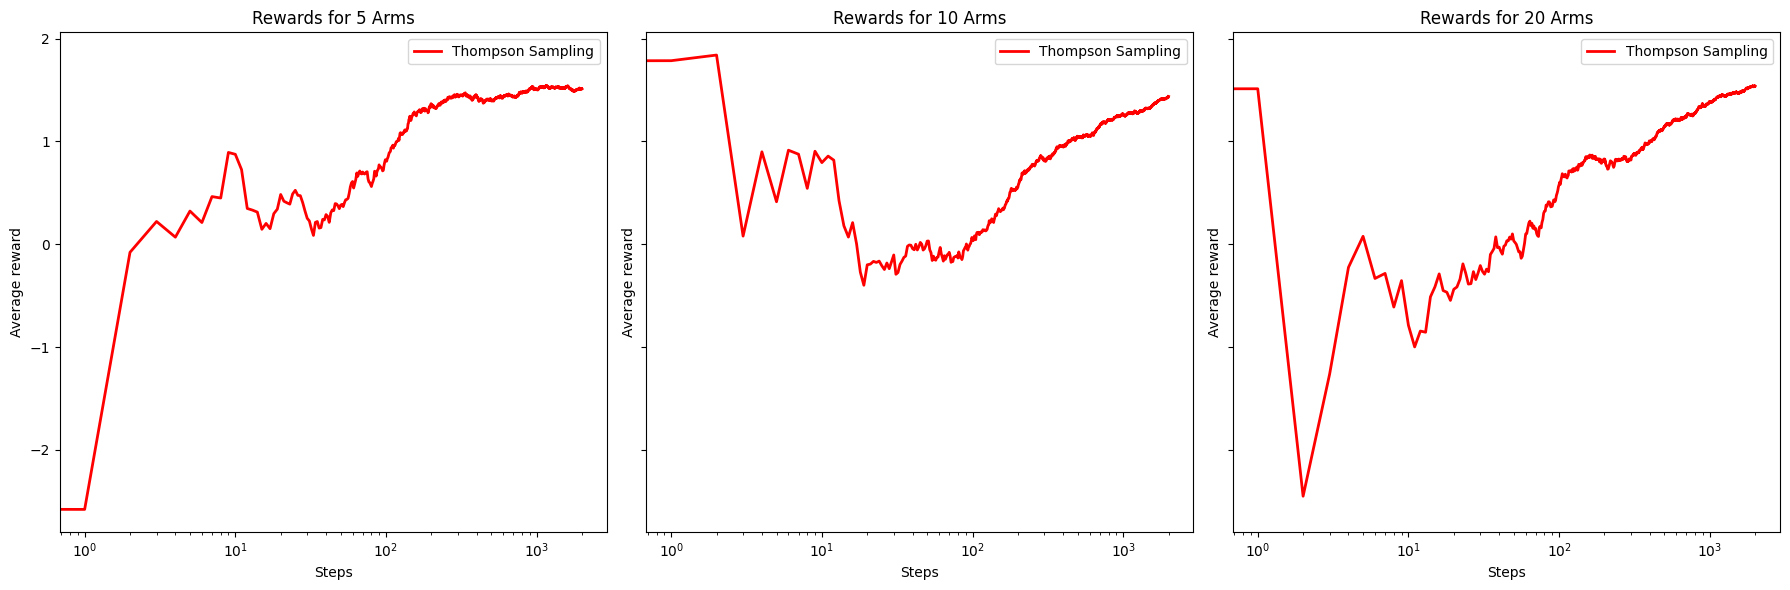

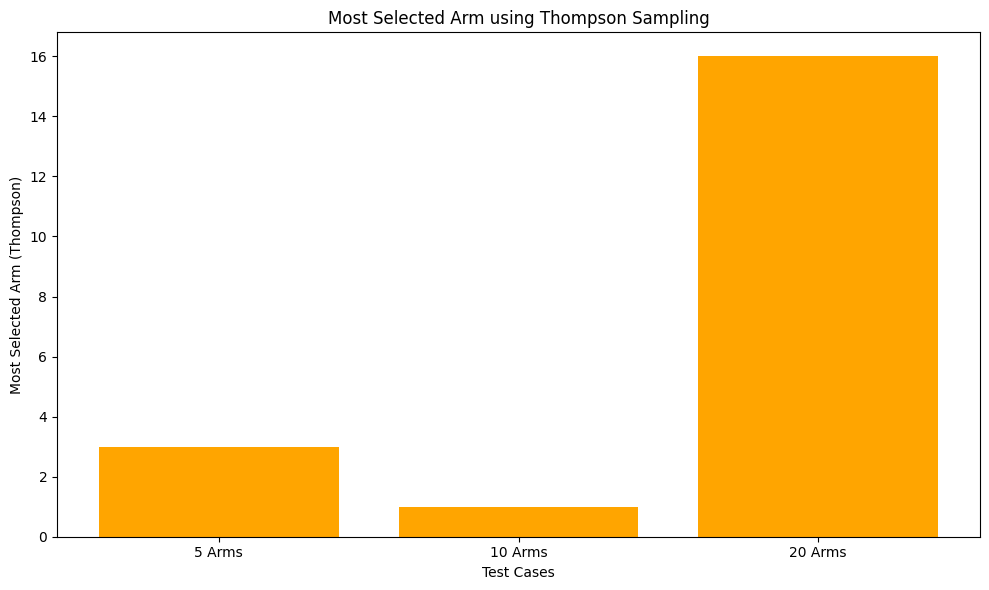

In [ ]:
import numpy as np
class ThompsonSampling:
    def __init__(self, True_mean_values, total_number_of_steps):
        self.n_arms = np.size(True_mean_values)
        self.true_mean_values = True_mean_values
        self.total_number_of_steps = total_number_of_steps
        self.successes = np.zeros(self.n_arms)
        self.failures = np.zeros(self.n_arms)
        self.current_step = 0
        self.mean_reward = np.zeros(total_number_of_steps + 1)
        self.current_reward = 0

    def select_arm(self):
        beta_samples = [np.random.beta(self.successes[i] + 1, self.failures[i] + 1) for i in range(self.n_arms)]
        arm_selected = np.argmax(beta_samples)

        self.current_step += 1
        reward = np.random.normal(self.true_mean_values[arm_selected], 2)
        self.current_reward = reward
        self.mean_reward[self.current_step] = self.mean_reward[self.current_step - 1] + \
            ((1 / self.current_step) * (self.current_reward - self.mean_reward[self.current_step - 1]))

        if reward > 0:
            self.successes[arm_selected] += 1
        else:
            self.failures[arm_selected] += 1

    def play_the_game(self):
        for i in range(self.total_number_of_steps):
            self.select_arm()

    def restart(self):
        self.current_step = 0
        self.successes = np.zeros(self.n_arms)
        self.failures = np.zeros(self.n_arms)
        self.mean_reward = np.zeros(self.total_number_of_steps + 1)
        self.current_reward = 0

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # Ensuring reproducibility
total_number_of_steps = 2000

# Define test cases with different numbers of arms
test_cases = {
    "5 Arms": np.random.normal(0, 1, 5),
    "10 Arms": np.random.normal(0, 1, 10),
    "20 Arms": np.random.normal(0, 1, 20),
}

# Dictionary to store results
thompson_rewards = {}
most_selected_arms_thompson = {}

# Running Thompson Sampling for each test case
for case, true_mean_values in test_cases.items():
    print(f"\nTesting {case} with Thompson Sampling for {total_number_of_steps} plays")

    # Initialize and play the Thompson Sampling algorithm
    bandit_ts = ThompsonSampling(true_mean_values, total_number_of_steps)
    bandit_ts.play_the_game()
    print(f"The true mean values assigned for this play is:{true_mean_values}")
    # print("the highest mean reward for the given algorithm is",mean_reward)

    # Store results
    thompson_rewards[case] = bandit_ts.mean_reward
    most_selected_arms_thompson[case] = np.argmax(bandit_ts.successes + bandit_ts.failures)
    print("the most selected arm",most_selected_arms_thompson[case])

# Plot Thompson Sampling Performance
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for idx, (case, rewards) in enumerate(thompson_rewards.items()):
    ax = axes[idx]
    ax.plot(np.arange(total_number_of_steps + 1), rewards, linewidth=2, label='Thompson Sampling', color='red')

    ax.set_xscale("log")
    ax.set_xlabel('Steps')
    ax.set_ylabel('Average reward')
    ax.set_title(f'Rewards for {case}')
    ax.legend()

plt.tight_layout()
plt.savefig('thompson_sampling_results.png', dpi=300)
plt.show()

# Plotting Most Selected Arms for Thompson Sampling
fig, ax = plt.subplots(figsize=(10, 6))
cases = list(most_selected_arms_thompson.keys())
arms = list(most_selected_arms_thompson.values())

ax.bar(cases, arms, color='orange')
ax.set_xlabel('Test Cases')
ax.set_ylabel('Most Selected Arm (Thompson)')
ax.set_title('Most Selected Arm using Thompson Sampling')
plt.tight_layout()
plt.savefig('thompson_selected_arms.png', dpi=300)
plt.show()